# Podstawy Sztucznej Inteligencji 2018/2019



Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# Numeryczne szukanie minimum funkcji

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Stochastic Gradient Descent (SGD)

Jest to najprostsza metoda szukania minimum funkcji $f(x)$. Argumentem funkcji w ogólności może być wektor $\overline{x}$ lub w najprostszym przypadku (rozpatrywanym teraz) liczba. Jest to metoda iteracyjna, zaczyna od pewnego punktu w przestrzeni parametrów i w każdym kroku przesuwa ten punkt w stronę wskazywaną przez gradient funkcji.

$$x_{i+1} =x_{i}-\alpha \frac{\partial f}{\partial x}(x_i)  $$

Znak minus bierze się stąd, że gradient wskazuje kierunek najszybszego rośnięcia funkcji, a chcemy szukać minimum. Parametr $\alpha$ to długość kroku, należy go dobrać odpowiednio do zagadnienia. Zbyt mała wartość może spowodować, że metoda będzie działać powoli lub utknie w minimum lokalnym, zbyt duża wartość spowoduje, że program nigdy nie znajdzie dokładnej odpowiedzi.

**1\. Funkcja kwadratowa**

Jedną z najprostszych funkcji, na których można ćwiczyć to funkcja kwadratowa $f(x)=ax^2+bx+c$.

Jej gradient wynosi $\frac{\partial f}{\partial x}=2ax+b$

Zbierając to razem dostajemy następujący wzór (nie pomylić alfy z a):

$$x_{i+1} =x_{i}-\alpha (2ax_i+b)  $$

Jako punkt początkowy $x_0$ należy wybrać losowo liczbę z przedziału [-10,10], parametr "steps" to ilość kroków optymalizacji, które ma wykonać program. Jako długość kroku $\alpha$ można wziąć na początek 0.01.

Funkcja SGD1 powinna zwrócić wartość x dla którego $f(x)$ ma minimum.

In [12]:
def SGD1(a, b, c, steps):
    x = np.random.uniform(-10,10)
    alpha = 0.01
    for i in range(steps):
        x += -alpha*(2*a*x + b)

    return x

In [14]:
np.testing.assert_almost_equal(SGD1(2, -3, 1, 10000), 0.75)
np.testing.assert_almost_equal(SGD1(2, 2, 1.23, 10000), -0.5)


**2\. Regresja liniowa**

Regresja liniowa to metoda znajdowania parametrów prostej $y=ax+b$ która najlepiej opisuje dane. Najczęściej robi się to [metodą najmniejszych kwadratów](https://pl.wikipedia.org/wiki/Metoda_najmniejszych_kwadrat%C3%B3w), która polega na zminimalizowaniu następującej funkcji:

$$L(a,b)=\sum_{j=0}^{n-1} (y_j-ax_j-b)^2$$

gdzie $x_i,y_i$ to odpowiednia para danych do których dopasowujemy prostą.

Gradient L ze względu na a i b jest równy:

$$\frac{\partial L}{\partial a}=-2\sum_{j=0}^{n-1}(y_j-ax_j-b)x_j$$
$$\frac{\partial L}{\partial b}=-2\sum_{j=0}^{n-1}(y_j-ax_j-b)$$

Tym razem równania wyglądają następująco
$$a_{i+1}=a_i-\alpha\frac{\partial L}{\partial a}=a_i+2\alpha\sum_{j=0}^{n-1}(y_j-ax_j-b)x_j$$
$$b_{i+1}=b_i-\alpha\frac{\partial L}{\partial b}=b_i+2\alpha\sum_{j=0}^{n-1}(y_j-ax_j-b)$$


Funksja SGD_reglin powinna zwrócić np.array z wartościami znalezionych a i b

In [15]:
# Generowanie danych do regresji liniowej
def genData(n, a, b, useNoise):
    result = np.zeros((n, 2)) #x_i=result[i][0], y_i=result[i][1]
    for i in range(0, n):
        x = -10 + 20 * np.random.uniform()
        result[i][0] = x
        result[i][1] = a * x + b
        if useNoise == True:
            result[i][1] += 0.1 * np.random.normal()
    return result

data_reglin1 = genData(100, 2, -3, False)
data_reglin2 = genData(100, 0.123, 1.4142, True)

answer_reglin1 = np.polyfit(data_reglin1[:,0], data_reglin1[:,1],1)
answer_reglin2 = np.polyfit(data_reglin2[:,0], data_reglin2[:,1],1)
print(answer_reglin1)
print(answer_reglin2)

[ 2. -3.]
[0.12282601 1.41239093]


In [23]:
# print(data_reglin1)

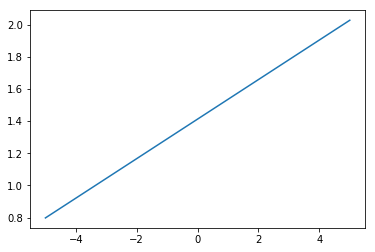

In [17]:
x = np.linspace(-5,5)
plt.plot(x, answer_reglin2[0]*x+ answer_reglin2[1])

In [56]:
def SGD_reglin(data, alfa, steps):
    a = 0.0
    b = 0.0
    x = data[:,0]
    y = data[:,1]
    
    for i in range(steps):
        a_grad = -2* np.sum((y-a*x-b)*x)
        b_grad = -2* np.sum(y-a*x-b)
        
        loss = np.sum((y - a*x +b)**2)
        a -= alfa*a_grad
        b -= alfa*b_grad
        
#         if i % 100 == 0:
#             print(loss)
    return np.array([a,b])
    
print(SGD_reglin(data_reglin1, 0.0001, 10000))
print(SGD_reglin(data_reglin2, 0.0001, 10000))


[ 2. -3.]
[0.12282601 1.41239093]


In [57]:
answer_reglin1=np.polyfit(data_reglin1[:,0],data_reglin1[:,1],1)
answer_reglin2=np.polyfit(data_reglin2[:,0],data_reglin2[:,1],1)
np.testing.assert_almost_equal(SGD_reglin(data_reglin1,0.0001,10000),np.array(answer_reglin1))
np.testing.assert_almost_equal(SGD_reglin(data_reglin2,0.0001,10000),np.array(answer_reglin2))


**3\. Funkcja Rosenbrocka**

Zadanie polega na znalezieniu minimum następującej funkcji $f(x,y)=(a-x)^2+b(y-x^2)^2$.


Funkcja SGD_rosenbrok powinna zwrócić np.array z wartościami znalezionych x i y. Zacznij od losowo wybranych $x_0, y_0 \in [-a,a]$.

In [62]:
def SGD_rosenbrock(a, b, alfa, steps):
    x = np.random.uniform(-a,a)
    y = np.random.uniform(-a,a)
    
    for i in range(steps):
        x_grad = 2* (a-x)*(-1)+2*b*(y-x**2)*(-2*x)
        y_grad = 2*b*(y-x**2)
        
        x -= alfa*x_grad
        y -= alfa*y_grad
    
    return np.array([x,y])



In [63]:
np.testing.assert_almost_equal(SGD_rosenbrock(-1, 100, 0.001, 1000000),np.array((-1, 1)))


**4\. Fitowanie wielomianu**

Tym razem należy dopasować wielomian p(x) stopnia $N$.

$$L(\overline{a})=\sum_{i=0}^{n-1} (y_i-p(x_i))^2$$
$$p(x)=\sum_{j=0}^{N} a_j x^j$$

Gradient L ze względu na $a_j$ jest równy:

$$\frac{\partial L}{\partial a_j}=-2\sum_{i=0}^{n-1}(y_i-p(x_i))x_i^j$$


Funkcja SGD_polyfit powinna zwrócić np.array z wartościami znalezionych współczynników $a_0, a_1, a_2...$ 

In [64]:
# Generowanie danych do następnych zadań
tmp_x = np.arange(-1, 1, 0.25)
tmp_y = np.polynomial.polynomial.polyval(tmp_x,np.array((-0.1, 0.4, -0.5)))
data_polyfit = np.zeros((len(tmp_x), 2))
for i in range(len(tmp_x)):
    data_polyfit[i][0] = tmp_x[i]
    data_polyfit[i][1] = tmp_y[i] + np.random.uniform(-0.1, 0.1)
answer_polyfit=np.polyfit(data_polyfit[:,0],data_polyfit[:,1],2)
answer_polyfit=answer_polyfit[::-1]

print(answer_polyfit)

[-0.12814462  0.42915426 -0.51060739]


In [487]:
def p(x, a, N):
    p_x = []
    for i in range(len(x)):
        p_x.append([])
        for j in range(N):
            p_x[i].append(a[j]*x[i]**j)
    return np.sum(np.array(p_x), axis = 1)

def SGD_polyfit(data, N, alfa, steps):
    a = np.random.uniform(-1,1,(N+1,1))
    x = data[:,0].reshape(-1,1)
    y = data[:,1]
    
    for step in range(steps):
        p_x = p(x,a, N+1)
        loss = np.sum((y - p_x)**2)
        for i in range(len(a)):
            gradient = -2 * np.sum((y.reshape(-1,1) - p_x)*(x**i))
            a[i] -= alfa * gradient
        
    return np.array(a.reshape(1,N+1)[0])


In [531]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def SGD_polyfit(data, N, alfa, steps):
    a = np.random.uniform(-1,1,(N+1,1))
    x = data[:,0].reshape(-1,1)
    y = data[:,1]
    pf = PolynomialFeatures(degree=N, include_bias=False)
    lr = LinearRegression(n_jobs=steps)
    new_x = pf.fit_transform(x)
    lr.fit(new_x, y)
    
    return np.hstack((lr.intercept_,lr.coef_))

In [532]:
out = SGD_polyfit(data_polyfit, 2, 0.001, 250000)
print(out)

[-0.12814462  0.42915426 -0.51060739]


In [533]:
np.testing.assert_almost_equal(int(round(100*out[0])), int(round(100*answer_polyfit[0])))
np.testing.assert_almost_equal(int(round(100*out[1])), int(round(100*answer_polyfit[1])))
np.testing.assert_almost_equal(int(round(100*out[2])), int(round(100*answer_polyfit[2])))

### W poniższych komórkach można zobaczyć efekt fitowania wielomianu stopnia 10 do 8 punktów danych oraz porównać wynik z prawidłowym.

In [495]:
pol = SGD_polyfit(data_polyfit, 10, 0.0005, 200000)
print(pol)

[-0.13544224  0.53184178 -0.37837388 -0.72986285 -0.49278085  0.88240998
 -0.00628315 -0.47616747  0.80213139  1.0664806   0.40377204]


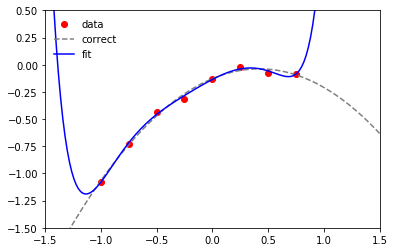

In [496]:
iksy = np.arange(-4, 4, 0.02)
igreki = np.polynomial.polynomial.polyval(iksy, pol)

plt.axis([-1.5, 1.5, -1.5, 0.5])
plt.plot(data_polyfit[:,0],data_polyfit[:,1],'o', color='red', label='data')
plt.plot(iksy, np.polynomial.polynomial.polyval(iksy, answer_polyfit), '--', color='gray', label='correct')
plt.plot(iksy, igreki, '-', color='blue', label='fit')
plt.legend(loc='upper left', frameon=False)
plt.show()

## Regularyzacja L2

Jak widać w poprzednim zadaniu, próba dopasowania wielomianu o zbyt dużym stopniu do zbyt małej ilości danych prowadzi do przefitowania. Przefitowanie jest częstym problemem w zastosowaniach uczenia maszynowego. Najprostszym rozwiązaniem jest zwiększenie ilości danych, co jednak nie zawsze jest możliwe (a czasami nawet to nie pomaga). Inną metodą jest regularyzacja L2. Polega ona na dodaniu dodatkowego członu do funkcji błędu, który wymusza stosowanie małych wartości parametrów.

$$L(\overline{a})=\sum_{i=0}^{n-1} (y_i-p(x_i))^2 + \eta \sum_{j=0}^{N} a_{j}^2 $$

gdzie $N$ to stopień wielomianu.

Zmieniony gradient L ze względu na $a_j$ jest równy:

$$\frac{\partial L}{\partial a_j}=-2\sum_{i=0}^{n-1}(y_i-p(x_i))x_i^j+ \eta a_j$$

Na początek można wziąć $\eta=10^{-4}$ i stopniowo zwiększać. Zauważ, że dla $\eta=0$ program powinien zwracać dokładnie te same wyniki co w poprzednim zadaniu.


In [504]:
def SGD_polyfit_L2(data, N, alfa, steps, eta):
    a = np.random.uniform(-1,1,(N+1,1))
    x = data[:,0].reshape(-1,1)
    y = data[:,1]
    
    for step in range(steps):
        p_x = p(x,a, N+1)
        loss = np.sum((y - p_x)**2)
        for i in range(len(a)):
            gradient = -2 * np.sum((y.reshape(-1,1) - p_x)*(x**i)) + eta*a[i]
            a[i] -= alfa * gradient
        
    return np.array(a.reshape(1,N+1)[0])


In [507]:
pol_L2 = SGD_polyfit_L2(data_polyfit, 10, 0.0005, 200000, 0.25)
print(pol_L2)

[-1.62678129e-01  3.53184649e-01 -2.78401255e-01  8.14419180e-02
 -1.33791846e-01  2.70792152e-02 -5.64264371e-02  1.66779943e-04
 -1.51682198e-02 -1.53646037e-02  7.39547869e-03]


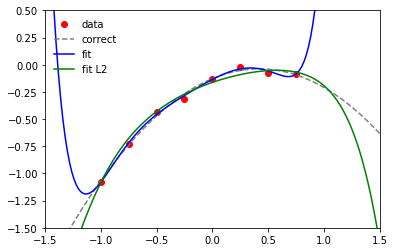

In [508]:
iksy = np.arange(-2, 2, 0.02)
igreki = np.polynomial.polynomial.polyval(iksy, pol)
igreki_L2 = np.polynomial.polynomial.polyval(iksy, pol_L2)
plt.axis([-1.5, 1.5, -1.5, 0.5])

plt.plot(data_polyfit[:,0],data_polyfit[:,1],'o', color='red', label='data')
plt.plot(iksy,np.polynomial.polynomial.polyval(iksy,answer_polyfit),'--',color='gray', label='correct')
plt.plot(iksy,igreki,'-',color='blue', label='fit')
plt.plot(iksy,igreki_L2,'-',color='green', label='fit L2')
plt.legend(loc='upper left', frameon=False)
plt.show()

In [509]:
out_noL2 = SGD_polyfit_L2(data_polyfit, 8, 0.0005, 200000, 0.0)
out_L2 = SGD_polyfit_L2(data_polyfit, 8, 0.0005, 200000, 0.5)
np.testing.assert_array_less(np.dot(out_L2, out_L2), np.dot(out_noL2, out_noL2))
